In [65]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
from pylab import legend
%matplotlib inline

In [2]:
# 数据准备，并保存

# stock_zh_index_spot_df = ak.stock_zh_index_spot()
# sindex_table = stock_zh_index_spot_df[['代码', '名称']]
# sindex_table.to_csv('./output/A股指数表.csv', index_label='id', mode='w')

sindex = 'sh000300' #对比指数
# stock_zh_index_daily_df = ak.stock_zh_index_daily(symbol=sindex)
# stock_zh_index_daily_df.to_csv(f'./output/指数/{sindex}_daily_history.csv', index_label='id', mode='w')

In [34]:
index_daily_df = pd.read_csv(f'../output/指数/{sindex}_daily_history.csv', index_col='id')
index_daily_df['date'] = pd.to_datetime(index_daily_df['date'])
index_daily_df.columns = ['date', 'i_open', 'i_high', 'i_low', 'i_close', 'i_volume']
index_daily_df

,date,i_open,i_high,i_low,i_close,i_volume
id,,,,,,
0,2002-01-04,1316.455,1316.455,1316.455,1316.455,0
1,2002-01-07,1302.084,1302.084,1302.084,1302.084,0
2,2002-01-08,1292.714,1292.714,1292.714,1292.714,0
3,2002-01-09,1272.645,1272.645,1272.645,1272.645,0
4,2002-01-10,1281.261,1281.261,1281.261,1281.261,0
...,...,...,...,...,...,...
4966,2022-06-27,4414.332,4472.695,4414.332,4444.264,17738567600
4967,2022-06-28,4442.581,4497.895,4407.352,4490.517,17475648900
4968,2022-06-29,4472.735,4503.131,4413.996,4421.357,18727668800


In [35]:
stock_code = '700' # 股票代码
curr_price = 354.4 # 当前价格
data_range = {'start':'20040616', 'end': '20220630'}
# 设定参数 结束

stock_hk_hist_df = ak.stock_hk_hist(symbol='00'+ stock_code, period="daily", 
                                    start_date=data_range['start'], end_date=data_range['end'], adjust="hfq")
stock_hk_hist_df['date'] = pd.to_datetime(stock_hk_hist_df['日期'])
stock_hk_hist_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,date
0,2004-06-16,4.375,4.150,4.625,4.075,439775008,1.947628e+09,14.86,12.16,0.450,26.17,2004-06-16
1,2004-06-17,4.150,4.225,4.375,4.125,83801504,3.556330e+08,6.02,1.81,0.075,4.99,2004-06-17
2,2004-06-18,4.200,4.025,4.250,3.950,36598000,1.492170e+08,7.10,-4.73,-0.200,2.18,2004-06-18
3,2004-06-21,4.125,4.000,4.125,3.950,22817000,9.210100e+07,4.35,-0.62,-0.025,1.36,2004-06-21
4,2004-06-23,4.050,4.425,4.450,4.025,55016000,2.344170e+08,10.63,10.63,0.425,3.27,2004-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...
4444,2022-06-24,2002.807,2027.534,2036.807,1976.019,18197838,6.940912e+09,3.07,2.39,47.393,0.19,2022-06-24
4445,2022-06-27,2041.959,1996.625,2109.959,1978.080,57400982,2.209893e+10,6.50,-1.52,-30.909,0.60,2022-06-27
4446,2022-06-28,1968.807,1932.747,1971.898,1884.322,58585070,2.128074e+10,4.39,-3.20,-63.878,0.61,2022-06-28
4447,2022-06-29,1902.868,1928.625,1956.444,1883.292,34975785,1.274040e+10,3.78,-0.21,-4.122,0.36,2022-06-29


In [38]:
merged_df = pd.merge(stock_hk_hist_df, index_daily_df, how='left', on='date')
plt_df = merged_df[['date', '收盘', 'i_close']]
plt_df

,date,收盘,i_close
0,2004-06-16,4.150,1141.093
1,2004-06-17,4.225,1116.504
2,2004-06-18,4.025,1103.403
3,2004-06-21,4.000,1109.391
4,2004-06-23,4.425,1110.319
...,...,...,...
4444,2022-06-24,2027.534,4394.772
4445,2022-06-27,1996.625,4444.264
4446,2022-06-28,1932.747,4490.517
4447,2022-06-29,1928.625,4421.357


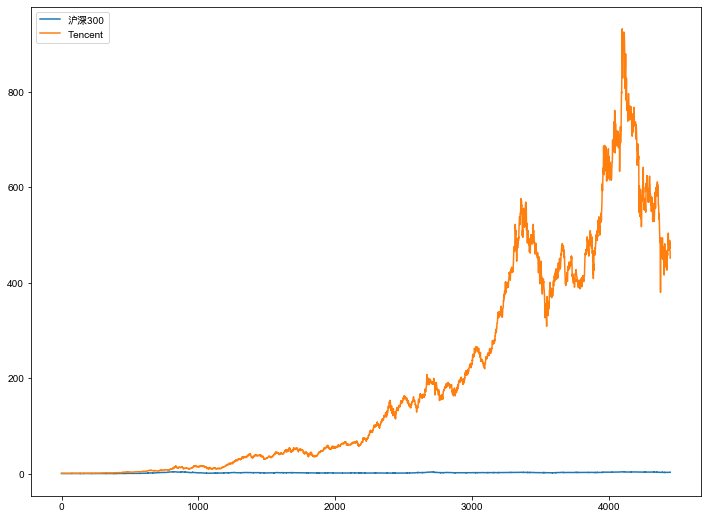

In [69]:
plt.rcParams["font.family"] = 'Arial Unicode MS'  # 设置字体，正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 设置字体，正常显示中文
plt.figure(figsize=(12, 9))

plt.plot(plt_df.index, plt_df['i_close']/1316.45, label='沪深300')
plt.plot(plt_df.index, plt_df['收盘']/4.15, label='Tencent')

plt.axis('tight')
# plt.xlabel('沪深300 vs Tencent')
legend(loc='upper left')

plt.savefig('../output/沪深300 vs Tencent.jpeg')